# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Predicting Boston Housing Prices

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

The code cell below will load the Boston housing dataset, along with a few of the necessary Python libraries required for this project.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
data.head()

ImportError: No module named visuals

In [2]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(data.MEDV)

# TODO: Maximum price of the data
maximum_price = np.max(data.MEDV)

# TODO: Mean price of the data
mean_price = np.mean(data.MEDV)

# TODO: Median price of the data
median_price = np.median(data.MEDV)

# TODO: Standard deviation of prices of the data
std_price = np.std(data.MEDV)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

> Similar to my experience in renting an apartment, an **INCREASE** in the the number of rooms [**RM**] in a home would lead to an **INCREASE** in the **PRICE** of that home, assuming all other things are held equal (e.g. given the same school district and neighborhood.)

> In a similar spirit, a **DECREASE** in the PTRATIO would lead to an **INCREASE** in the MEDV. A lower student-teacher ratio implies better schools, somehow.

> An **DECREASE** in 'LSTAT' leads to a **INCREASE** in 'MEDV'. Poorer neighborhoods have cheaper homes. Poor people like me can't afford to live in the Hamptons.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

> An $R^2 = 0.923$, captures the model well enough. Since R$^2$ is essentially derived from the sum of the square of the residuals, with an R$^2$ = 0, implying a maximum residuals (i.e. a terrible fit) and R$^2$ = 1, a perfect fit, an $R^2$ like this is deemed "successful" enough.

> But, if I were given an x-value, so that I have a set of (x$_{data}$, y$_{data}$, y$_{pred}$), as well as a functional form of the model, I would opt to plot this function and visually check how well the fit is. It is pretty common  to be misled by trusting $R^2$ too much at face-value.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
cv = ShuffleSplit(data.shape[0], n_iter=100, test_size=0.2, random_state=143)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=143)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

> Splitting the data into testing and training subsets allows you to check (i.e. cross-validate) your algorithim's performance and predictions on data that are ***different*** from your training set, and is useful you to test against **over-fitting**. Using the same training set for testing would give you an incorrect perception on your algorithm's performace, as it would just give the same perfect prediction, all the time. This would not be useful in predicting anything new.

-----


## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

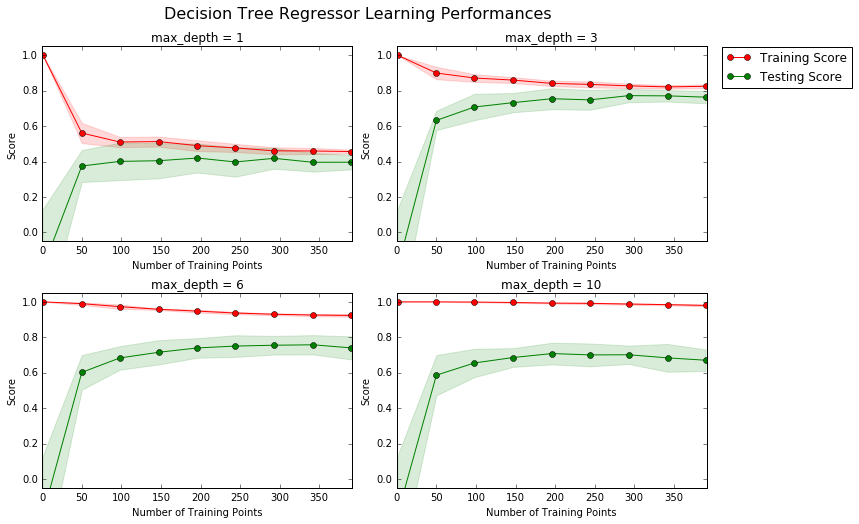

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

## Answers: 

> ### Chosen plot **max_depth = 6 **.

> The training curve is consistently **much** larger (with a wider spread) than the cross-validation score for all number of training points shown here -- an indication of over-fitting. (Here, the training score gives an incorrect impression of the learning performance, especially in the points at low training sizes.) The training curve asymptotes to score $ \sim  0.9$, while the validation to a score $\sim 0.75$. As these two curves already have converged to their respective asymptotic values, it would not be useful add more training points to the model.

> 
---

> But I am also trying to understand an underfit decision tree regressor, max_depth = 1.
  Here, both the training and validation scores are quite low. Even as one adds more and more data, no improvement is achieved on these scores. For an underfit tree, fewer training points would benefit the computational speed, but wouldn't help in improving the prediction performance. More complexity is required, NOT more data points.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

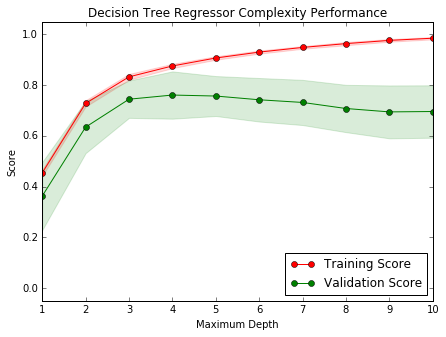

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

### Answers: 
** When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?**

> In this case the model sufferes from a **high bias**, as indicated by the very low scores on **BOTH** the training and testing scores.

** How about when the model is trained with a maximum depth of 10? **

> In this case, the model suffers from **high variance**. This is reflected by having SCORE$_{train}$ >> SCORE$_{test}$, at max_depth = 10

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

> I am debating between max_depth = 4 and max_depth = 5. 

> The validation complexity curve appears to have some maximum (optimum) score ($\approx$ 0.75), occuring at max_depth = {4, 5}, which then decreases as the tree complexity increases. Now if we look at the learning curve for the training set, the score significantly improved from a max_depth =  4 to a max_depth = 5.

> $\therefore$ In choosing which max_depth better generalizes to unseen data, I would choose the one where the scores is optimized, while being careful not to overfit the data. Hence, I choose a **max_depth = 5 ** for my tree regressor.


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

> As one tunes an algorithm, one tries different paramters. For example, if one chooses an SVM classifier, one needs to optimize parameters as C, gamma and the type of kernel. One can do a brute-force-by-hand search, trying various combinations of these parameters, and then evaluating performance via various scores. This type of brute-force method is rather very messy and clunky, and has a huge potential of missing the optimum set of paramters.

> The better way to do it, as always is make the computer do it for you such as sklearn's [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html). This creates a grid of values in the parameter hyperspace, using the various combinations of the parameters and then tests the model performance at each point in the grid. The combination of parameters giving the best score is then spit-out, thereby optimizing the learning algo.


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
 > k-fold cross validation technique separates the data set into $k$ subsets of roughly equal size, and performing the learning experiment $k$ times. At the $k^{th}$ experiment, the subset $k$ is set aside as the testing set, while the remaining k-1 subsets are combined to form the training set. An average error/score across many trials is computed. 
 
 > The major advantage of this technique is that every data point is used for BOTH testing and training, minimizing the effect of bias in the dataset.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': np.arange(1, 11, 1)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring = scoring_fnc)#, verbose=10)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **

> It chose max_depth = 4, my second choice. Well, now that I stand corrected, I still would take this better than the more complex model with max_depth =5, by virtue of Occam's razor.

***Question for you: So different scoring methods, make up for different optimal parameter choice? Is there a more robust scorer that exists in the world.***


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,166.67
Predicted selling price for Client 2's home: $189,140.00
Predicted selling price for Client 3's home: $844,200.00


In [12]:
print "STATS FOR THE FANCIEST CRIB IN THE DATASET"
print data.loc[data.MEDV == max(data.MEDV)]
print "---------------------------------------------"
print "STATS FOR THE CHEAPEST CRIB(S) IN THE DATASET"
print data.loc[data.MEDV == min(data.MEDV)]
print "---------------------------------------------"
print "STATS FOR THE $407K - CRIB IN THE DATASET"

print data.loc[(data.MEDV > 393000) & (data.MEDV < 395000)]

STATS FOR THE FANCIEST CRIB IN THE DATASET
        RM  LSTAT  PTRATIO       MEDV
253  8.398   5.91     13.0  1024800.0
---------------------------------------------
STATS FOR THE CHEAPEST CRIB(S) IN THE DATASET
        RM  LSTAT  PTRATIO      MEDV
381  5.453  30.59     20.2  105000.0
388  5.683  22.98     20.2  105000.0
---------------------------------------------
STATS FOR THE $407K - CRIB IN THE DATASET
        RM  LSTAT  PTRATIO      MEDV
112  5.913  16.21     17.8  394800.0
124  5.879  17.58     19.1  394800.0


**Answer: **
> I have pulled out the relevant stats for the cheapest, most expensive houses in the dataset and for a 5-bedroom house.
      
> **For Client 1**: In comparison to the (RM, LSTAT and PTRATIO's) of the other $\$394K$ homes in the dataset, the prediction is resonable for me, in this case.

> **For client 2**: In comparison to the cheapest home, Client 2's home has less rooms, worse economy, and worse student-teacher ratio. For this reason, a $\$224$ is too expensive.

> **For client 3**: In comparison to the most expensive home in the dataset, Client 3's house have about the same number of rooms, and better neighborhood economy and better student-teacher ratio. I would expect a more expensive price than the $\$870K$ predicted.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
> Although it has been 35 years since the data were collected, I think in some sense this dataset is still relevant (assuming that the prices have been *correctly* scaled to account for 35 years of market inflation). It should give us some ballpark as to how much a house would cost given the three features that we looked at.  

> For a more accurate analysis, however, we need more recent data. Features of a home such as updated home appliances, more efficient heating/cooling, repainting, presence of a yard, pool, entertainment, famous neighbors(?), crime rate, etc would to some degree affect the price. The year that the house was built would also affect its price. The historical value of a property is also an important price indicator (e.g. homes in [Nantucket](https://en.wikipedia.org/wiki/Nantucket)).

> In my opinion, the model is robust enough. The $\$69K$ range is only about 17% of the average prediction. But because money  is ($\sim \$69K$) involved, I would like more robust predictor, if I were to buy/sell a home. In this case, we could use more examples, and, potentially, additional features for better consistency.

> Data collected in a rural area should be different from that of an urban area. This comes down to the law of supply and demand. In urban areas, such as NYC, DC and Boston, there are a lot more "stuff" going on (i.e. jobs, entertainment, schools/universities) compared to rural areas. People tend to gravitate to where the jobs are. As a result the demand for housing becomes high, while space remains limited.